In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')
test_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv')
# data= pd.concat([df,test_df],axis=0)
# print(test_df.head)
df.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,<NA>,Reg,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,<NA>,IR1,Lvl,AllPub,...,0,<NA>,<NA>,<NA>,0,12,2008,WD,Normal,250000


In [3]:
df['MSZoning'].value_counts()

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int32

In [4]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   object
 6   Alley          91 non-null     object
 7   LotShape       1460 non-null   object
 8   LandContour    1460 non-null   object
 9   Utilities      1460 non-null   object
 10  LotConfig      1460 non-null   object
 11  LandSlope      1460 non-null   object
 12  Neighborhood   1460 non-null   object
 13  Condition1     1460 non-null   object
 14  Condition2     1460 non-null   object
 15  BldgType       1460 non-null   object
 16  HouseStyle     1460 non-null   object
 17  OverallQual    1460 non-null   int64
 18  OverallCond    1460 non-null   

# handling missing values

In [5]:
# import missingno as msno 
# msno.bar(df)

As we can see both test and train data have missing values so we will handle them both

dropping follwing columns as their total entries are too low

In [6]:
# data.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [7]:
# print(df['BsmtCond'].value_counts())
# print(df['BsmtQual'].value_counts())
# print(df['FireplaceQu'].value_counts())
# print(df['GarageType'].value_counts())
# print(df['GarageFinish'].value_counts())
# print(df['GarageQual'].value_counts())
# print(df['BsmtFinType2'].value_counts())
# print(df['GarageCond'].value_counts())
# print(df['MasVnrType'].value_counts())
# print(df['MasVnrType'].value_counts())
# print(df['BsmtExposure'].value_counts())


In [8]:
df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)
# df.drop(['Alley','PoolQC','Fence','MiscFeature'],axis=1,inplace=True)

In [9]:
df['LotFrontage']=df['LotFrontage'].fillna(df['LotFrontage'].mean())
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mean())
df['GarageYrBlt']=df['GarageYrBlt'].fillna(df['GarageYrBlt'].mean())
# data.info()

In [10]:
cols=['BsmtCond','BsmtQual','FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','MasVnrType',
'BsmtExposure']
for i in cols:
    df[i]=df[i].fillna(df[i].mode()[0])
#     data[i]=data[i].fillna(data[i].mode()[0])
    
df.shape

(1460, 77)

dropping null records

<AxesSubplot:>

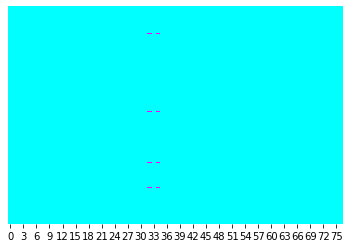

In [11]:
# sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='cool')
sns.heatmap(df.isnull().as_matrix(),yticklabels=False,cbar=False,cmap='cool')

In [12]:
df['BsmtFinType1']=df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

<AxesSubplot:>

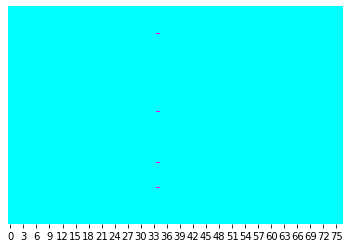

In [13]:
sns.heatmap(df.isnull().as_matrix(),yticklabels=False,cbar=False,cmap='cool')

In [14]:
df['BsmtFinType2']=df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

<AxesSubplot:>

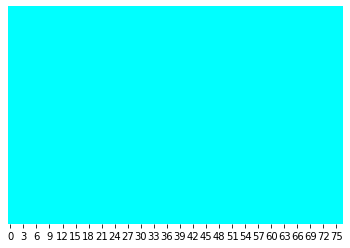

In [15]:
sns.heatmap(df.isnull().as_matrix(),yticklabels=False,cbar=False,cmap='cool')

In [16]:
df.info()

<class 'cudf.core.dataframe.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 77 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             1460 non-null   int64
 1   MSSubClass     1460 non-null   int64
 2   MSZoning       1460 non-null   object
 3   LotFrontage    1460 non-null   float64
 4   LotArea        1460 non-null   int64
 5   Street         1460 non-null   object
 6   LotShape       1460 non-null   object
 7   LandContour    1460 non-null   object
 8   Utilities      1460 non-null   object
 9   LotConfig      1460 non-null   object
 10  LandSlope      1460 non-null   object
 11  Neighborhood   1460 non-null   object
 12  Condition1     1460 non-null   object
 13  Condition2     1460 non-null   object
 14  BldgType       1460 non-null   object
 15  HouseStyle     1460 non-null   object
 16  OverallQual    1460 non-null   int64
 17  OverallCond    1460 non-null   int64
 18  YearBuilt      1460 non-null   i

In [17]:


columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']



In [18]:
one_hot_encoded_data = pd.get_dummies(df,
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive'])
print(one_hot_encoded_data.shape)
target = df.iloc[:,-1]
target

(1460, 277)


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [19]:
# one_hot_encoded_data= one_hot_encoded_data.loc[:,~one_hot_encoded_data.columns.duplicated()]
# one_hot_encoded_data.shape

In [20]:
one_hot_encoded_data.drop(['SalePrice'],axis=1,inplace=True)
one_hot_encoded_data.shape

(1460, 276)

In [21]:
# from cuml.preprocessing import StandardScaler
# scaler=StandardScaler()
# X_scaled=scaler.fit_transform(one_hot_encoded_data)
# X_scaled

In [22]:
# from cuml.model_selection import train_test_split
# X_train, X_test, y_train, y_test= train_test_split(one_hot_encoded_data,target, test_size=0.3, random_state=42)
from cuml.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(one_hot_encoded_data,target, test_size=0.3, random_state=42)

In [23]:
from cuml.linear_model import LinearRegression
lr_eig = LinearRegression(fit_intercept = True, normalize = False, algorithm = "eig")
lr_svd = LinearRegression(fit_intercept = True, normalize = False, algorithm = "svd")
lr_qr = LinearRegression(fit_intercept = True, normalize = False, algorithm = "qr")
lr_svdqr = LinearRegression(fit_intercept = True, normalize = False, algorithm = "svd-qr")
lr_svdjac = LinearRegression(fit_intercept = True, normalize = False, algorithm = "svd-jacobi")

In [24]:
lr_eig.fit(x_train, y_train)
lr_svd.fit(x_train, y_train)
lr_qr.fit(x_train, y_train)
lr_svdqr.fit(x_train, y_train)
lr_svdjac.fit(x_train, y_train)

LinearRegression()

In [25]:
preds_eig = lr_eig.predict(x_val)
preds_svd = lr_svd.predict(x_val)
preds_qr = lr_qr.predict(x_val)
preds_svdqr = lr_svdqr.predict(x_val)
preds_svdjac = lr_svdjac.predict(x_val)

In [26]:
preds_eig = preds_eig.astype(np.int64)
preds_svd = preds_svd.astype(np.int64)
preds_qr = preds_qr.astype(np.int64)
preds_svdqr = preds_svdqr.astype(np.int64)
preds_svdjac = preds_svdjac.astype(np.int64)

In [27]:
algos = ['eig','svd','qr','svdqr','svdjacob']

In [28]:
from cuml.metrics.regression import mean_absolute_error
import numpy
mae = numpy.empty(shape=[5])
mae[0]=(mean_absolute_error(y_val, preds_eig))
mae[1]=(mean_absolute_error(y_val, preds_svd))
# mae[2]=(mean_absolute_error(y_val, preds_qr))
mae[3]=(mean_absolute_error(y_val, preds_svdqr))
mae[4]=(mean_absolute_error(y_val, preds_svdjac))
print(mae)

[1.36722148e+005 1.91358881e+004 6.91358415e-310 1.88749635e+004
 1.91358881e+004]


In [29]:


from cuml.metrics.regression import mean_squared_error
mse = numpy.empty(shape=[5])
mse[0]=(mean_squared_error(y_val, preds_eig))
mse[1]=(mean_squared_error(y_val, preds_svd))
# mse[2]=(mean_squared_error(y_val, preds_qr))
mse[3]=(mean_squared_error(y_val, preds_svdqr))
mse[4]=(mean_squared_error(y_val, preds_svdjac))
print(mse)



[7.75757188e+010 9.31974927e+008 6.91358415e-310 9.09978773e+008
 9.31974927e+008]


In [30]:
y_val = y_val.astype(np.float64)
preds_eig = preds_eig.astype(np.float64)
preds_svd = preds_svd.astype(np.float64)
preds_qr = preds_qr.astype(np.float64)
preds_svdqr = preds_svdqr.astype(np.float64)
preds_svdjac = preds_svdjac.astype(np.float64)

In [31]:
from cuml.metrics.regression import r2_score
r2 = numpy.empty(shape=[5])
r2[0]=(r2_score(y_val, preds_eig))
r2[1]=(r2_score(y_val, preds_svd))
# r2[2]=(r2_score(y_val, preds_qr))
r2[3]=(r2_score(y_val, preds_svdqr))
r2[4]=(r2_score(y_val, preds_svdjac))
print(r2)

[-1.21279849e+001  8.42283733e-001  6.91358415e-310  8.46006098e-001
  8.42283733e-001]


In [32]:
# import cuml
# from cuml.metrics.regression import mean_squared_error,r2_score,mean_absolute_error
# from cuml import LinearRegression
# lr = LinearRegression(fit_intercept = True, normalize = False, algorithm = 'eig')
# reg = lr.fit(X_train,y_train)
# print("Coefficients:")
# print(reg.coef_)
# print("Intercept:")
# print(reg.intercept_)
# preds = lr.predict(X_test)
# print("Predictions:")
# print(preds)
# preds=preds.astype(np.int64)
# print("MSE:")
# print(mean_squared_error(y_test,preds))
# print("R2 Score:")
# preds=preds.astype(np.float64)
# print(r2_score(y_test,preds))
# print("MAE:")
# preds=preds.astype(np.int64)
# print(mean_absolute_error(y_test,preds))

In [33]:
# algorithm = ['svd', 'eig', 'qr', 'svd-qr', 'svd-jacobi']
# for i in algorithm:
#     print("Algorithm:")
#     print(i)
#     lr = LinearRegression(fit_intercept = True, normalize = False, algorithm = i)
#     reg = lr.fit(X_train,y_train)
#     preds = lr.predict(X_test)
#     print("MSE:")
#     print(cuml.metrics.regression.mean_squared_error(y_test,preds))
#     print("R2 Score:")
#     print(cuml.metrics.regression.r2_score(y_test,preds))
#     print("MAE:")
#     print(cuml.metrics.regression.mean_absolute_error(y_test,preds))